# 囚人のジレンマゲームの実験2

概要: [README.md](./readme.md)  

In [11]:
#-*- encoding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('./user_strategies')
import play as pl
from Iida_perfect_monitoring import Iida_pm
from Iida_imperfect_public import Iida_ipm
from Iida_imperfect_private import Iida_iprm
from kato import KatoStrategy
from ikegami_perfect import Self_Centered_perfect
from ikegami_imperfect_public import Self_Centered_public
from ikegami_imperfect_private import Self_Centered_private
from mhanami_Public_Strategy import PubStrategy
from mhanami_Imperfect_Public_Strategy import ImPubStrategy
from mhanami_Imperfect_Private_Strategy import ImPrivStrategy
from tsuyoshi import GrimTrigger
from gistfile1 import MyStrategy
from beeleb_Strategy import beeleb
from oyama import OyamaPerfectMonitoring, OyamaImperfectPublicMonitoring, OyamaImperfectPrivateMonitoring
from ogawa import ogawa
from yamagishi_impd import yamagishi

# Test

各戦略のテスト

In [12]:
import unittest

class TestStrategies(unittest.TestCase):
    def setUp(self):
        self.Strategies = [Iida_pm, Iida_ipm, Iida_iprm, KatoStrategy, Self_Centered_perfect, \
                          Self_Centered_public, Self_Centered_private, PubStrategy, ImPubStrategy, ImPrivStrategy, \
                          MyStrategy, beeleb, OyamaPerfectMonitoring, \
                           OyamaImperfectPublicMonitoring, OyamaImperfectPrivateMonitoring, \
                          ogawa, yamagishi, GrimTrigger] # ここに自作のclassを入れる
        self.case1 = "Signal is empty(period 1)"
        self.case2 = [0, 1]
        self.case3 = [1, 0]
        self.case4 = [0, 1, 0, 1, 0, 0, 1]

        self.seed = 11451
        self.RandomState = np.random.RandomState(self.seed)


    # case1を引数に渡してテスト
    def test1(self):
        print("testcase:", self.case1)
        for Strategy in self.Strategies:
            rst = Strategy(self.RandomState).play()
            self.assertIsNotNone(rst, Strategy.__module__)
            self.assertIn(rst, (0, 1), Strategy.__module__)


    # case2を引数に渡してテスト
    def test2(self):
        print("testcase:", self.case2)
        for Strategy in self.Strategies:
            S = Strategy(self.RandomState)
            for signal in self.case2:
                S.get_signal(signal)
                rst = S.play()
            
            self.assertIsNotNone(rst, Strategy.__module__)
            self.assertIn(rst, (0, 1), Strategy.__module__)


    # case3を引数に渡してテスト
    def test3(self):
        print("testcase:", self.case3)
        for Strategy in self.Strategies:
            S = Strategy(self.RandomState)
            for signal in self.case3:
                S.get_signal(signal)
            
            rst = S.play()
            self.assertIsNotNone(rst, S.__module__)
            self.assertIn(rst, (0, 1), S.__module__)


    # case4を引数に渡してテスト
    def test4(self):
        print("testcase:", self.case4)
        for Strategy in self.Strategies:
            S = Strategy(self.RandomState)
            for signal in self.case4:
                S.get_signal(signal)
                rst = S.play()
                self.assertIsNotNone(rst, S.__module__)
                self.assertIn(rst, (0, 1), S.__module__)

In [10]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestStrategies)
unittest.TextTestRunner().run(suite)

....

testcase: Signal is empty(period 1)
testcase: [0, 1]
testcase: [1, 0]
testcase: [0, 1, 0, 1, 0, 0, 1]



----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Test: OK

# 実験のセットアップ

In [13]:
payoff = np.array([[4, 0], [5, 2]])
seed = 20141019
rs = np.random.RandomState(seed)
discount_v = 0.97
repeat = 1000
ts_length = rs.geometric(p=1-discount_v, size=1000) + 1

# Case1: perfect monitoring

In [15]:
strategies = [Iida_pm, PubStrategy, KatoStrategy, Self_Centered_perfect, GrimTrigger, MyStrategy, beeleb, OyamaPerfectMonitoring, ogawa, yamagishi]
game = pl.RepeatedMatrixGame(payoff, strategies, signal=None, ts_length=ts_length, repeat=1000)
game.play(mtype="perfect", random_seed=seed, record=True)

Start
The object has 10 strategy functions below
****************************************
Iida_perfect_monitoring.Iida_pm
mhanami_Public_Strategy.PubStrategy
kato.KatoStrategy
ikegami_perfect.Self_Centered_perfect
tsuyoshi.GrimTrigger
gistfile1.MyStrategy
beeleb_Strategy.beeleb
oyama.OyamaPerfectMonitoring
ogawa.ogawa
yamagishi_impd.yamagishi
****************************************
Repeats: 1000
Total time series length: 34333

Game 1: "Iida_perfect_monitoring.Iida_pm" vs "mhanami_Public_Strategy.PubStrategy"
<class 'numpy.int64'>
96040
total score of Iida_perfect_monitoring.Iida_pm: 96040.000, per stage: 2.797
total score of mhanami_Public_Strategy.PubStrategy: 104995.000, per stage: 3.058

Game 2: "Iida_perfect_monitoring.Iida_pm" vs "kato.KatoStrategy"
<class 'numpy.int64'>
60464
total score of Iida_perfect_monitoring.Iida_pm: 60464.000, per stage: 1.761
total score of kato.KatoStrategy: 85969.000, per stage: 2.504

Game 3: "Iida_perfect_monitoring.Iida_pm" vs "ikegami_perfect.Self

## グラフを出力

### 各対戦、各periodにおいて、それぞれのプレイヤーがCooperationをとっている割合

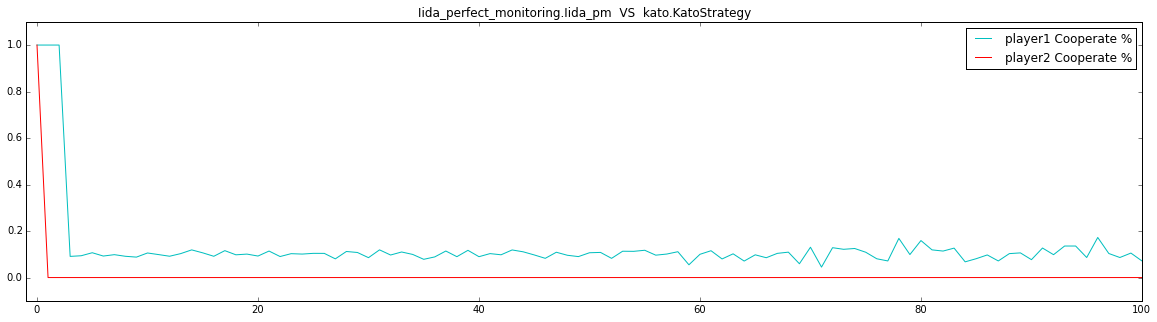

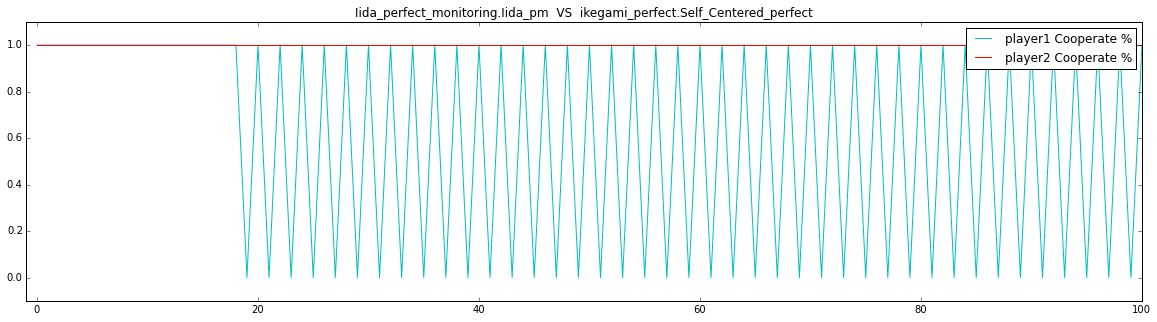

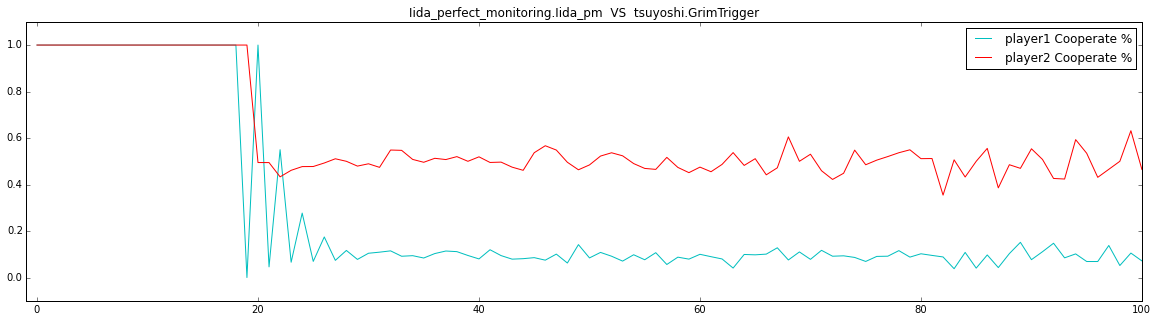

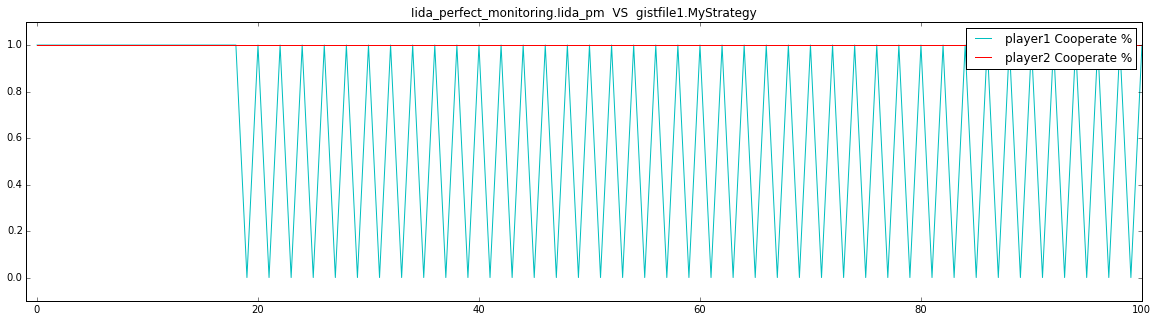

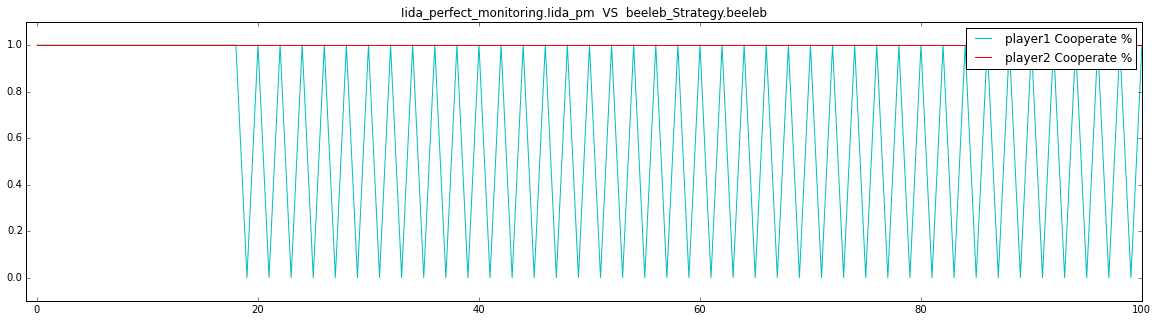

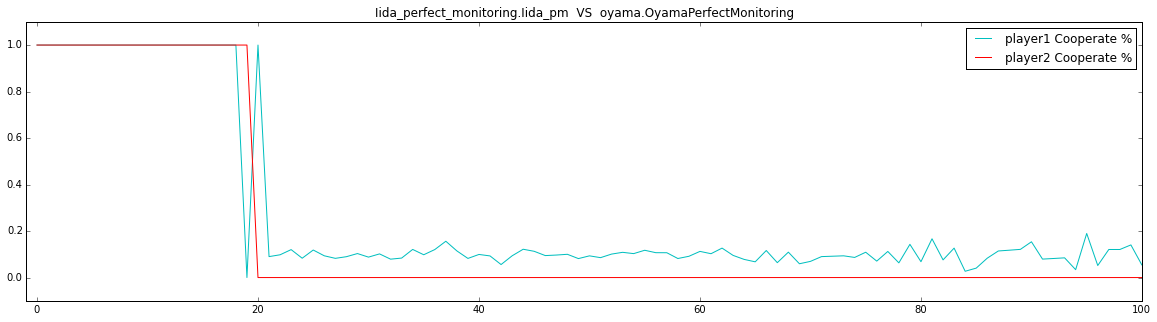

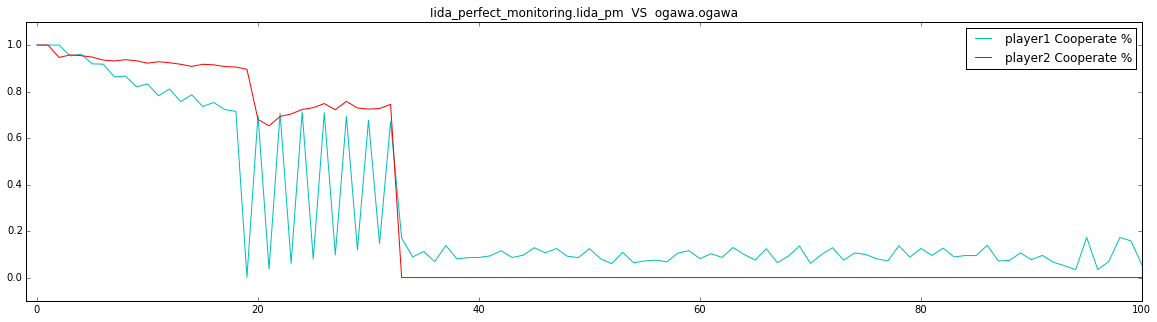

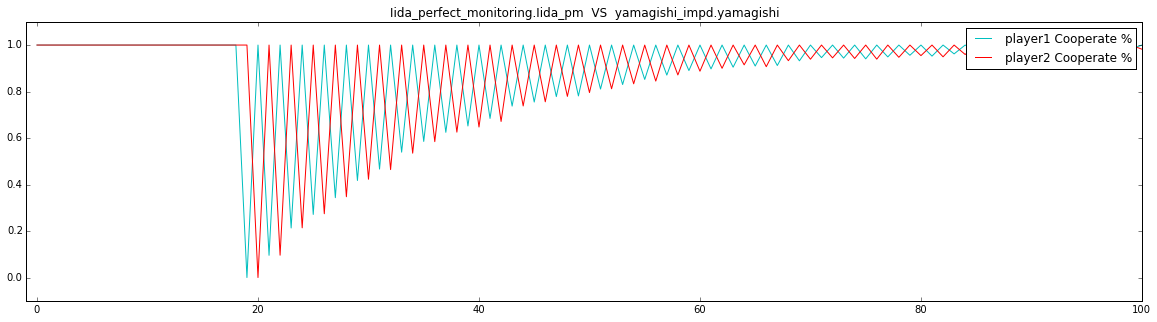

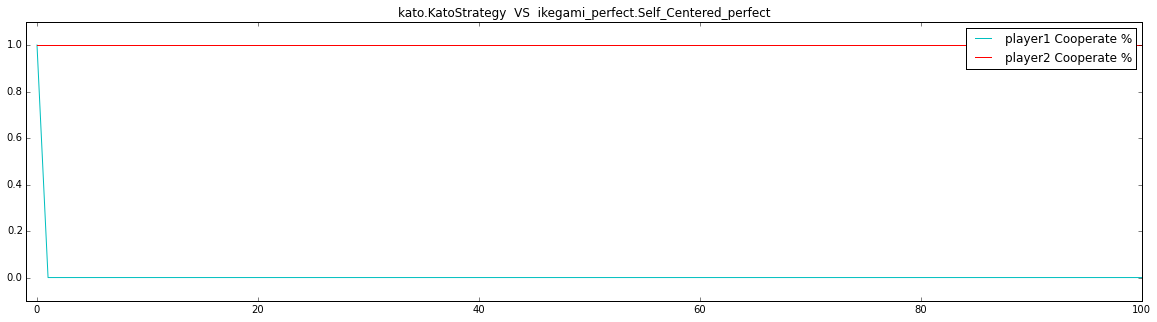

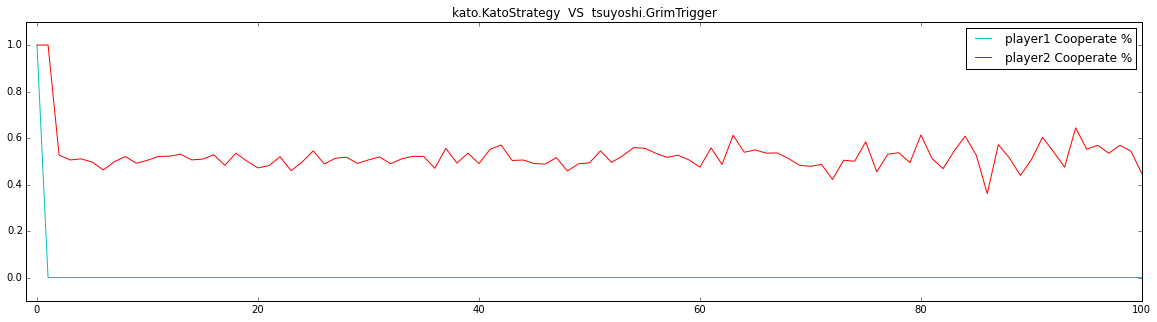

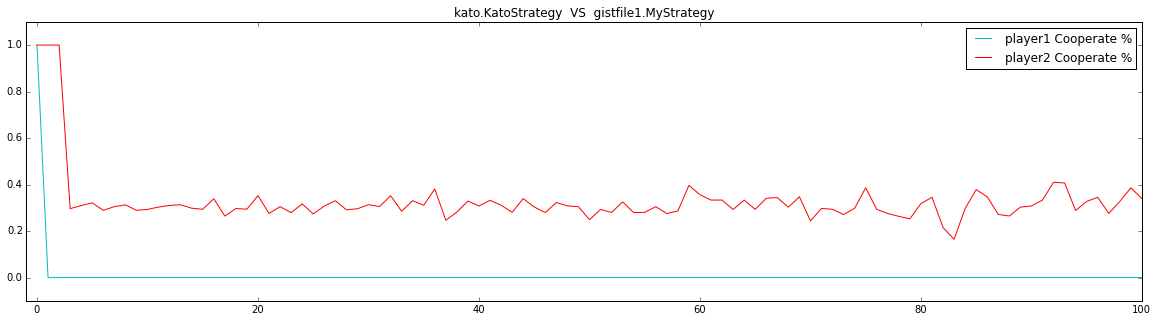

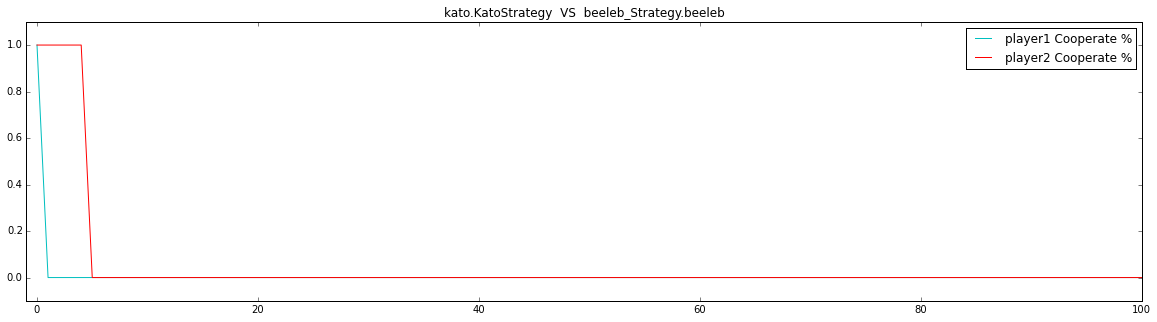

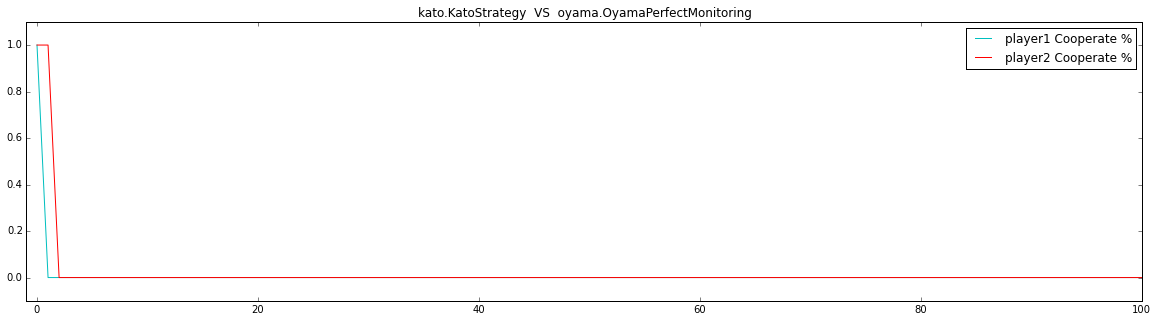

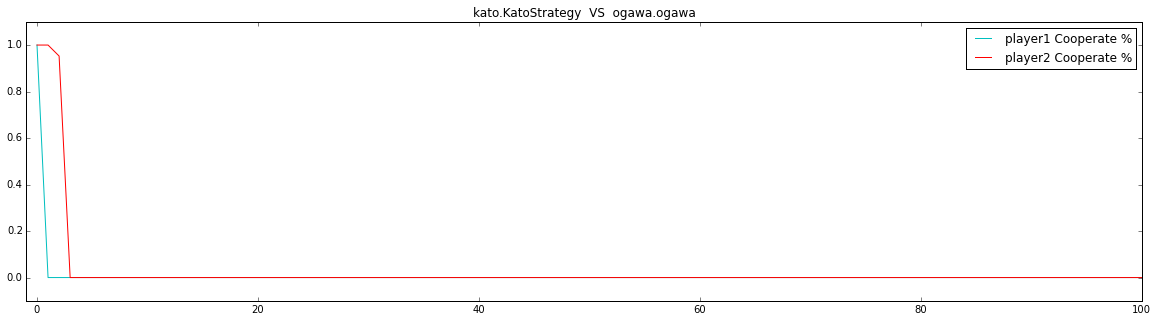

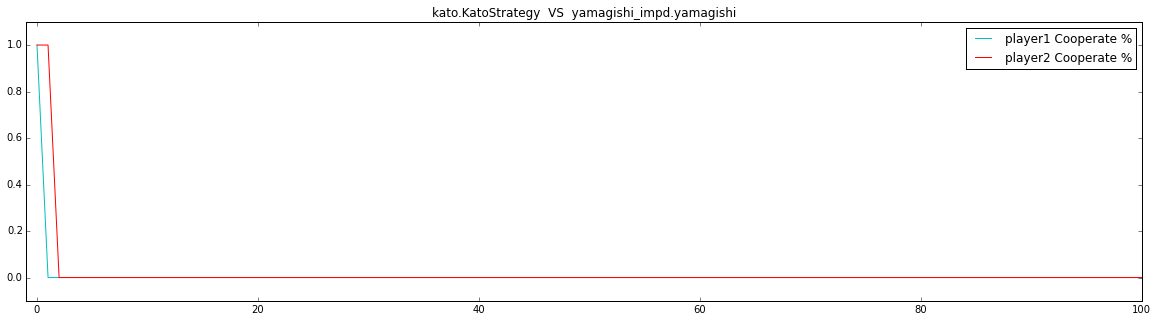

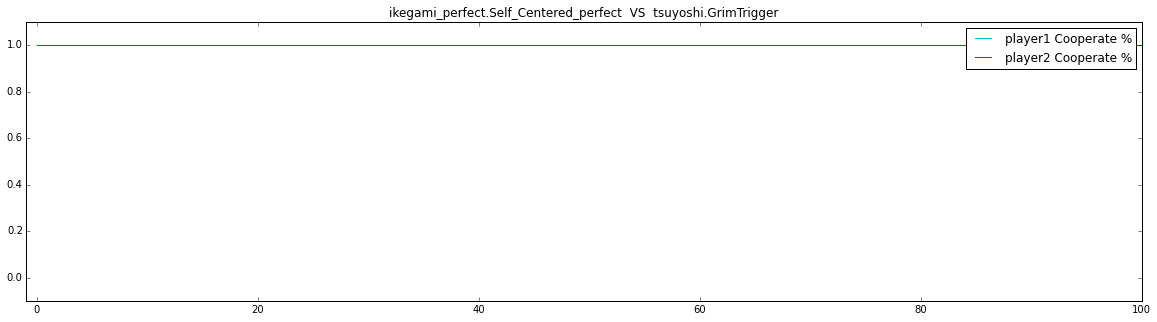

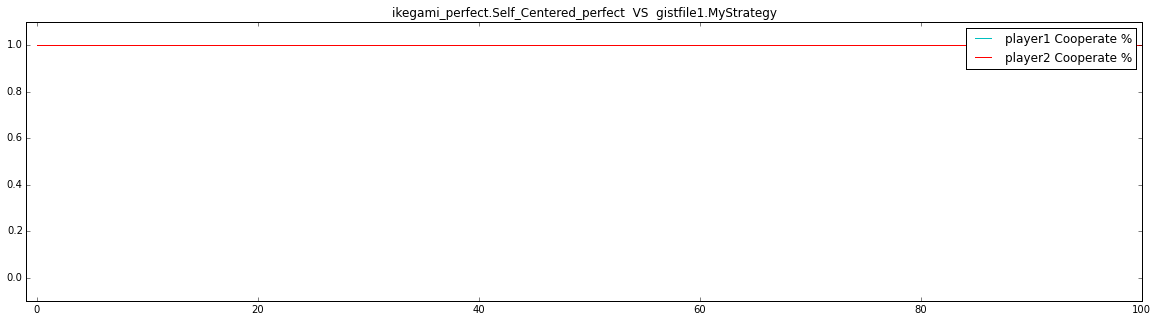

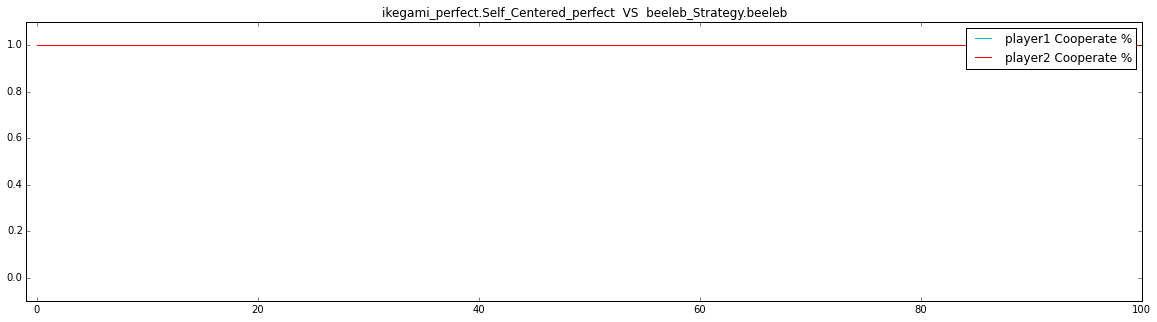

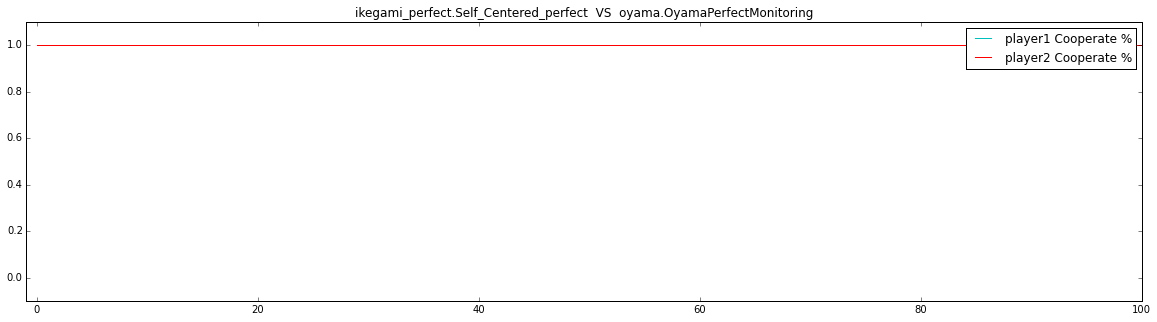

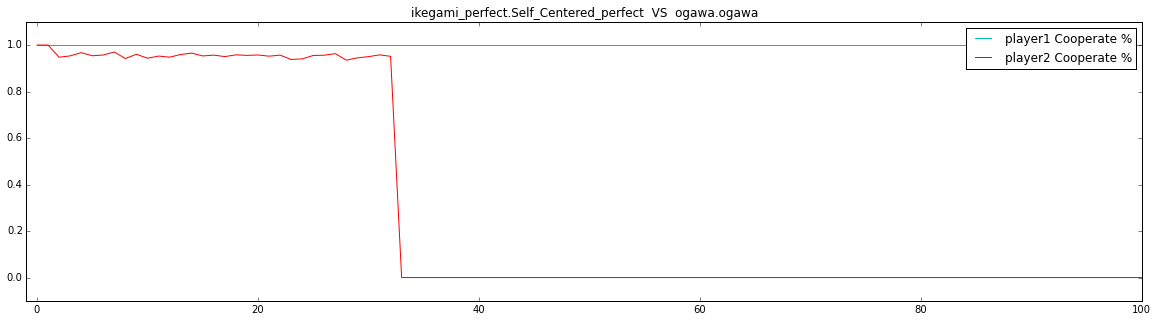

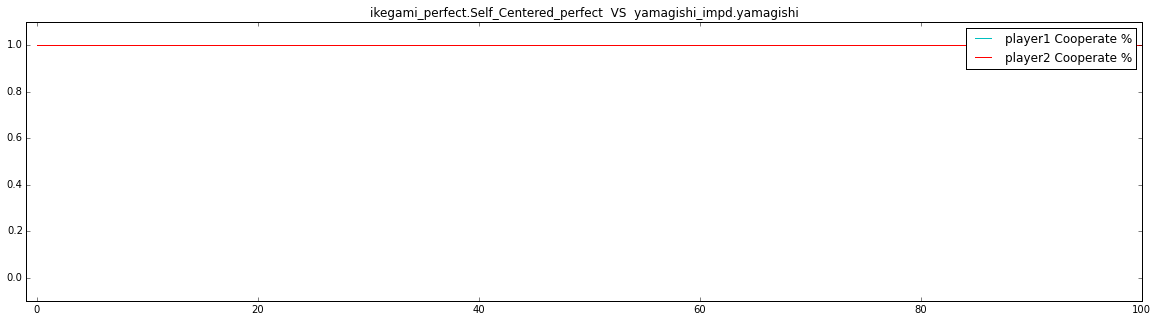

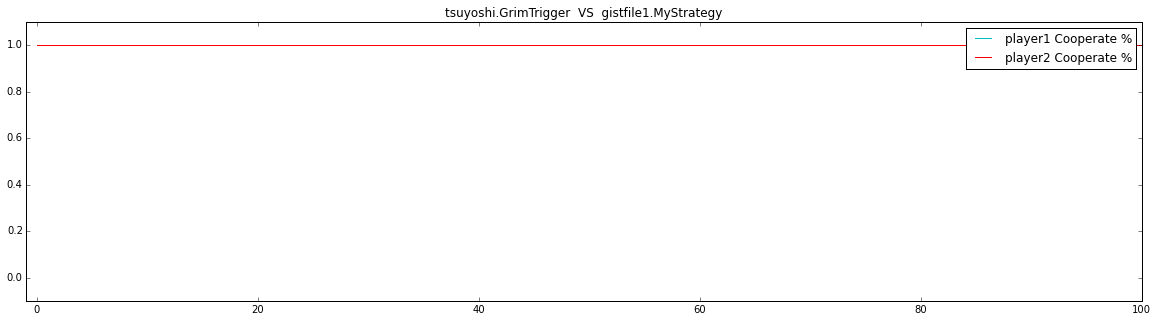

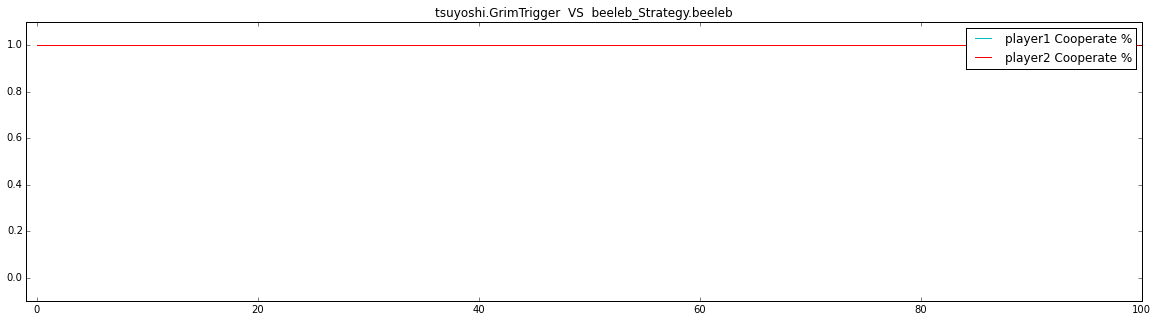

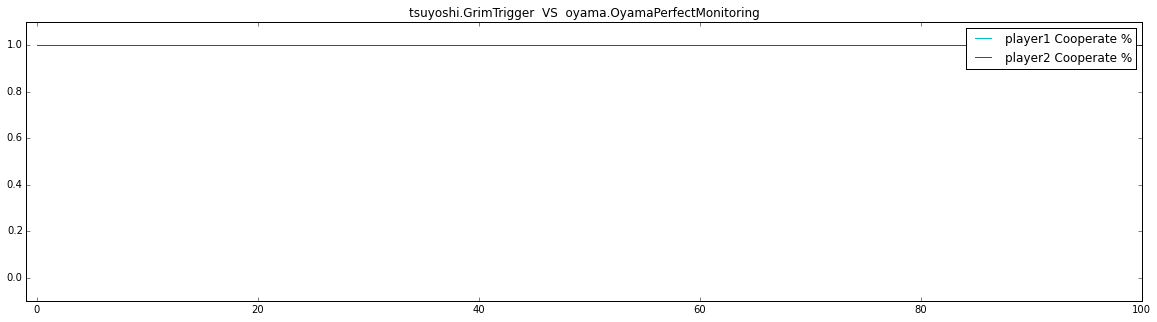

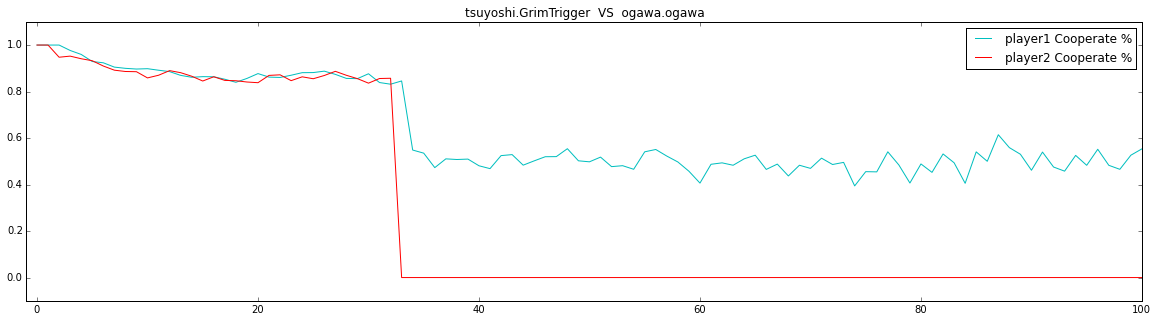

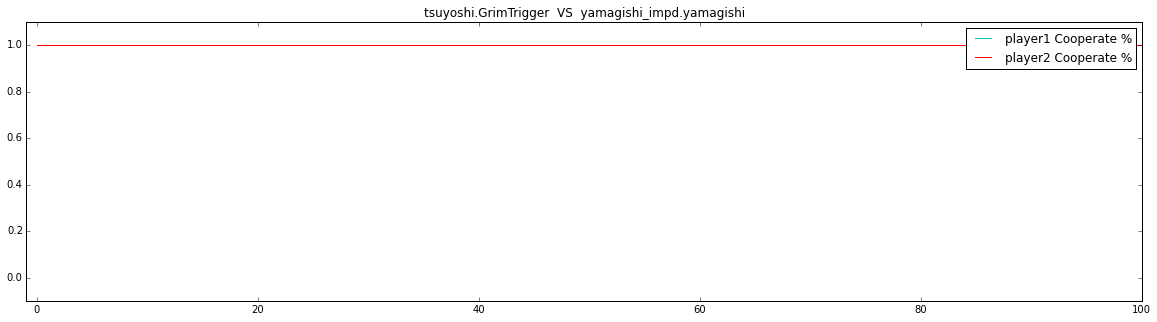

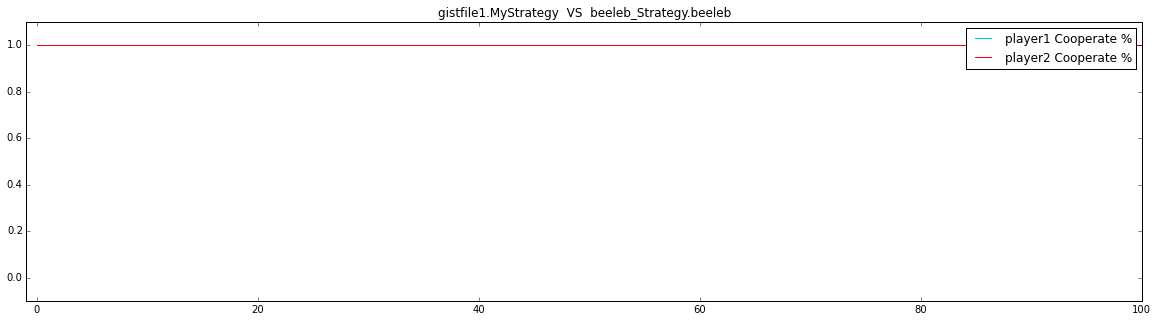

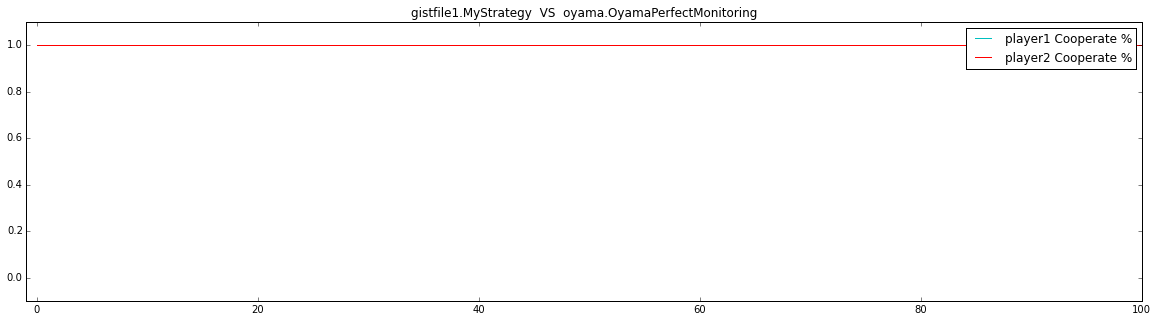

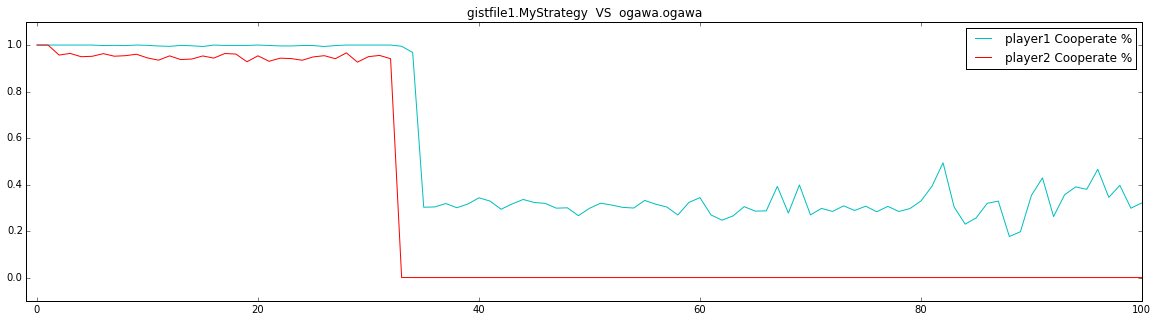

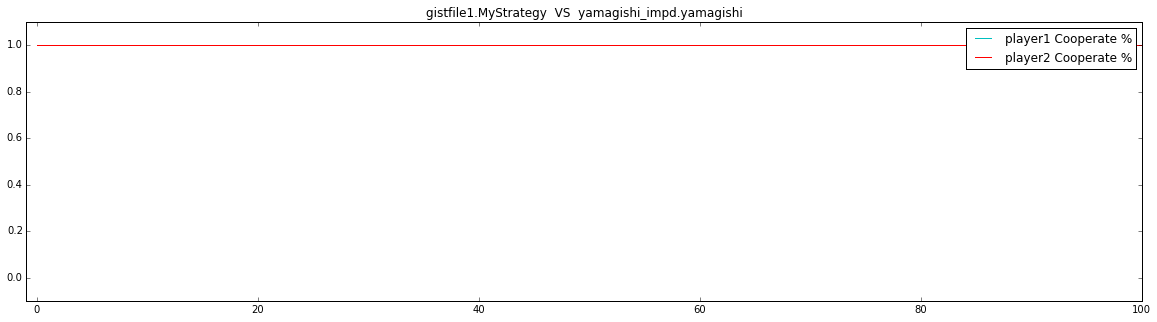

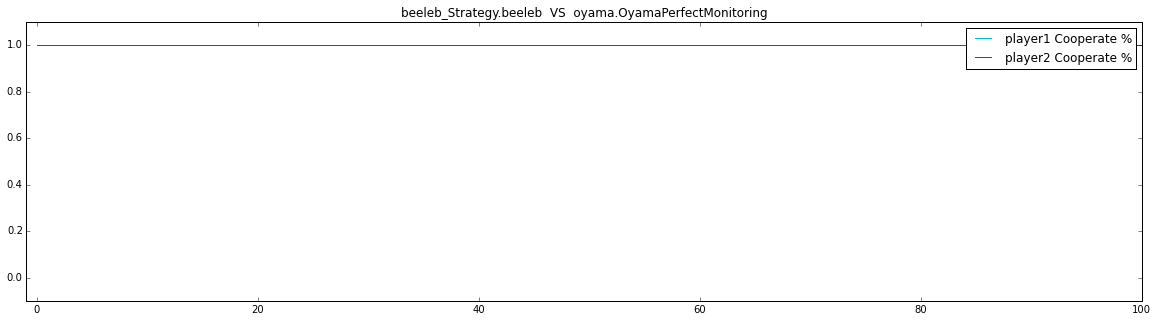

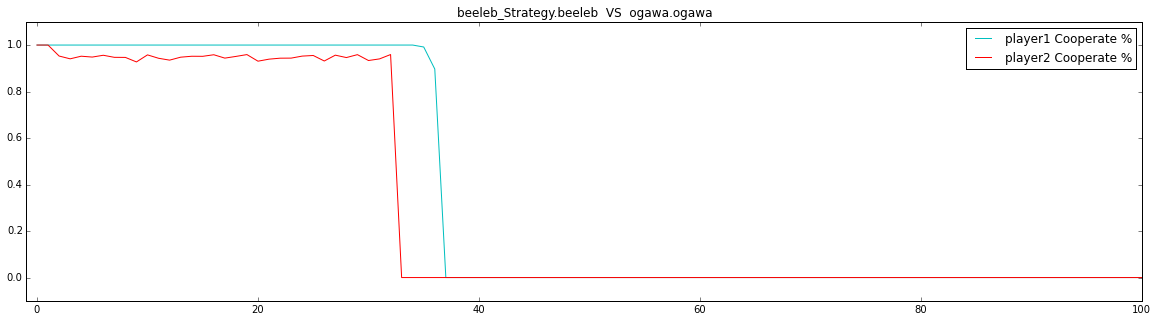

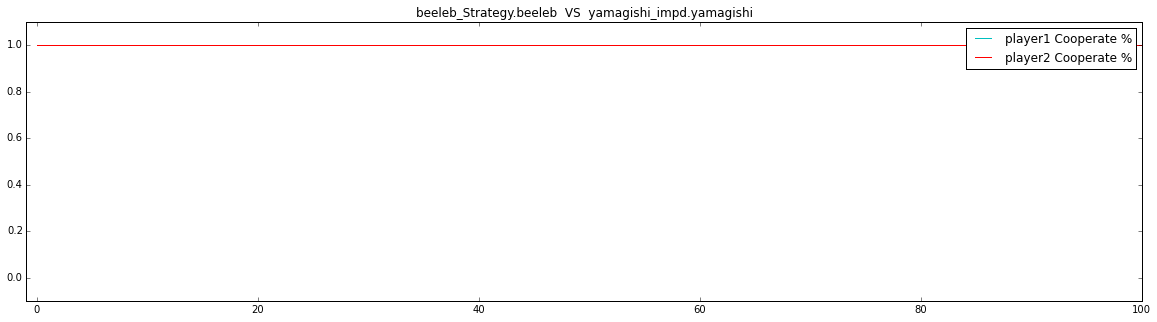

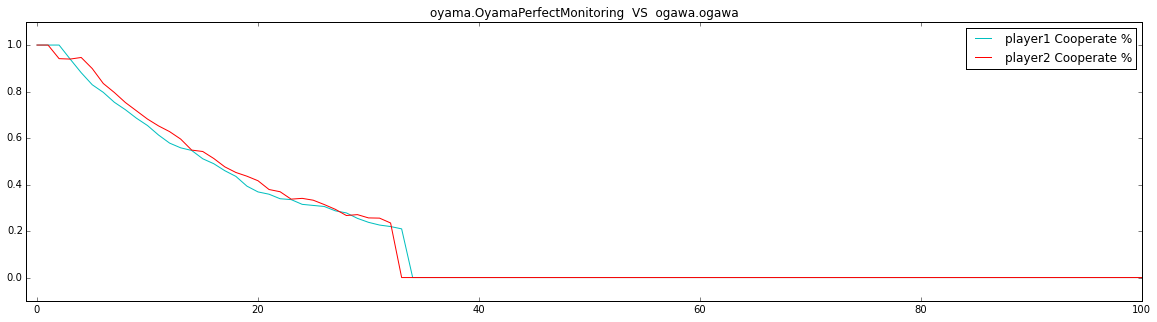

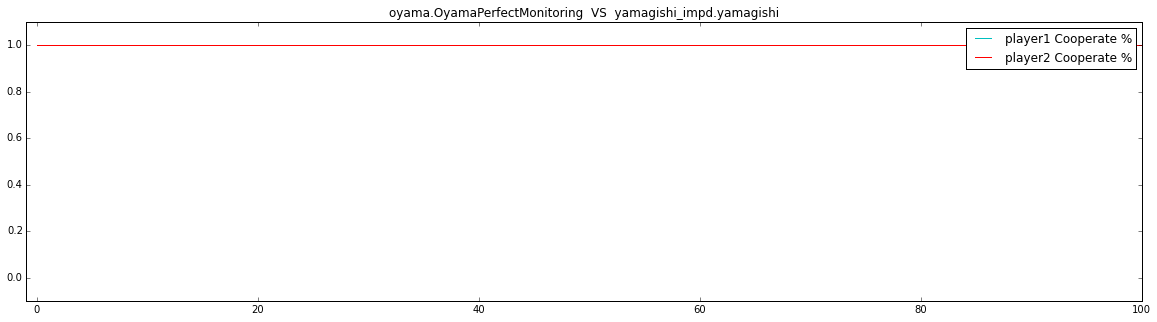

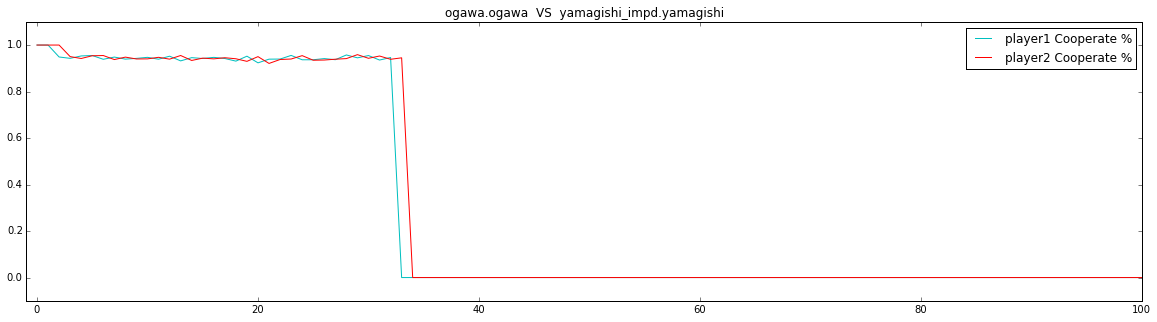

In [10]:
def normalize(array_2d):
    copy_array = np.array(array_2d, dtype=float)
    for v in copy_array:
        total = np.sum(v)
        v /= total
    return copy_array


def __plotC__(periods, action1, action2, **kwargs):
    period_max = kwargs.get('period_max', np.max(periods)+1)
    title = kwargs.get('title', None)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.xlim(-1, period_max)
    plt.ylim(-0.1, 1.1)
    plt.plot(periods, action1, color='c', label='player1 Cooperate %')
    plt.plot(periods, action2, color='r', label='player2 Cooperate %')
    if title:
        plt.title(title)
    
    plt.legend()
    plt.show()


# period毎にどの程度協力が行われているかをplot
def plotC(df):
    # 対戦組み合わせの数
    match_len = df['Match'].max() + 1

    # 1対戦のゲーム数
    round_len = df['Round'].max() + 1

    # 最長period
    period_max = df['Period'].max() + 1

    for m in range(match_len):
        df_match = df[df_perfect.Match == m].reset_index()
        str1 = df_match['Strategy1'][0]
        str2 = df_match['Strategy2'][0]
        df_match_s = df_match.loc[:, ["Round", "Period", "Action1", "Action2"]]
        df_match_np = df_match_s.as_matrix()

        periods = np.arange(period_max)
        action1 = np.zeros((period_max, 2), dtype=int)
        action2 = np.zeros((period_max, 2), dtype=int)

        for r in range(round_len):
            df_round = df_match_np[df_match_np[:, 0] == r]
            period_len = int(df_round[:, 1].max()+1)
            for p in range(period_len):
                stage_df = df_round[df_round[:, 1] == p]
                stage_action1 = stage_df[:, 2]
                stage_action2 = stage_df[:, 3]

                if stage_action1 == 0:
                    action1[p, 0]  += 1
                else:
                    action1[p, 1] += 1

                if stage_action2 == 0:
                    action2[p, 0]  += 1
                else:
                    action2[p, 1] += 1
                    
        action1 = normalize(action1)
        action2 = normalize(action2)
        __plotC__(periods, action1[:, 0], action2[:, 0], period_max=100, title='{0}  VS  {1}'.format(str1, str2))

        
# 結果の読み込み
df_perfect = pd.read_csv("record_2015-10-19-18-40-27.csv")
plotC(df_perfect)

### 各対戦、ゲーム毎の平均利得分布

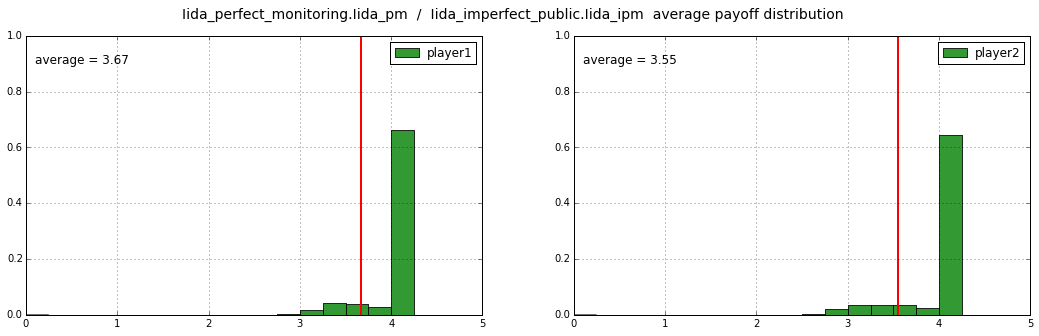

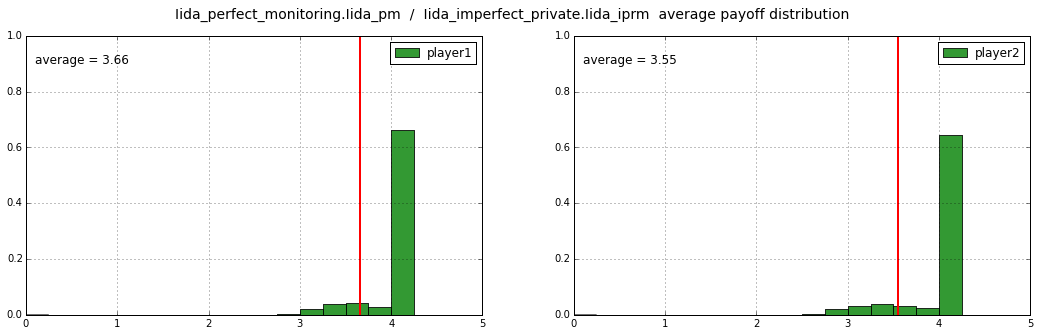

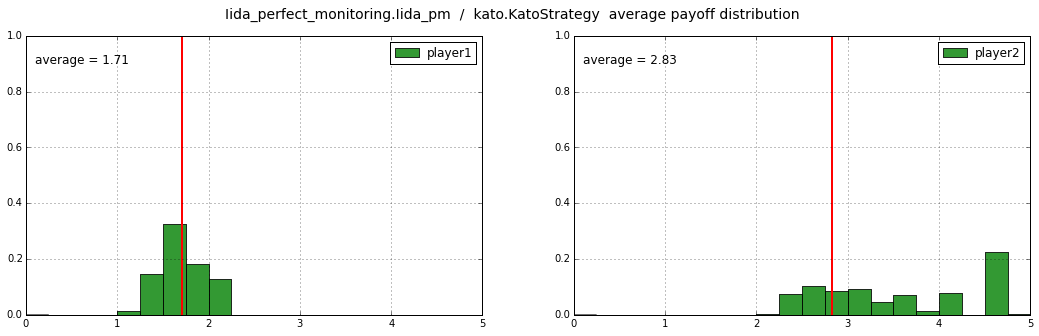

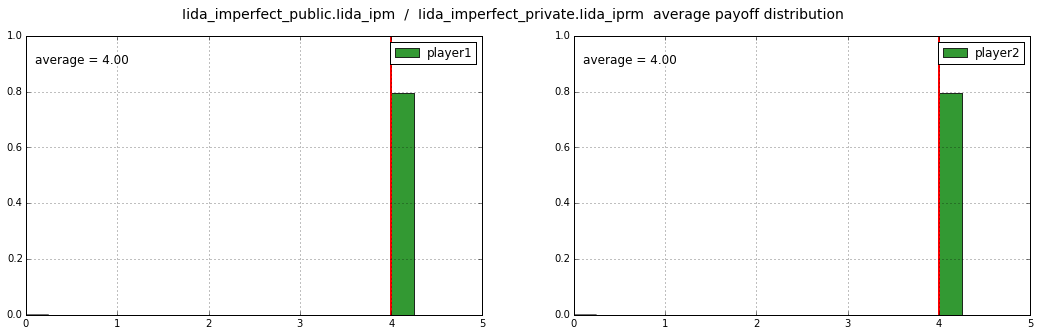

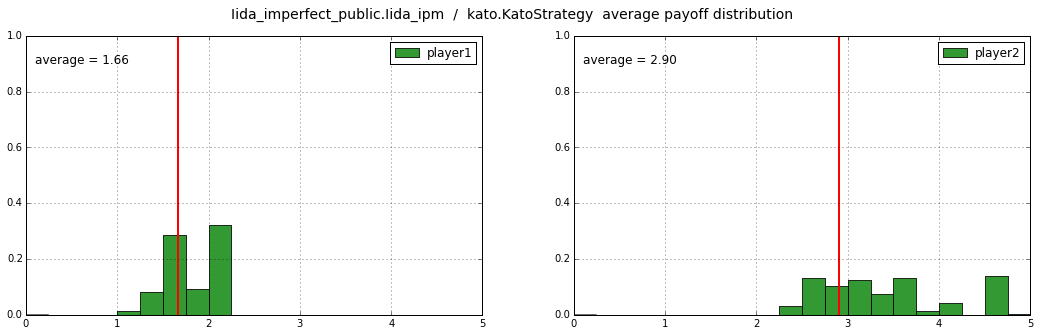

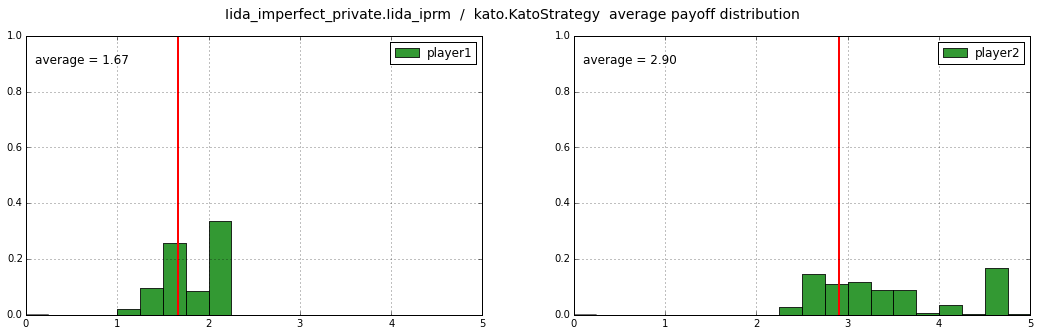

In [136]:
def __plotAve__(ts_length, ave_payoff1, ave_payoff2, **kwargs):
    title = kwargs.get('title', None)
    fig = plt.figure(figsize=(18, 5)) 
    
    weight1 = np.ones_like(ave_payoff1)/ts_length/100
    ax1 = plt.subplot(1, 2, 1)
    ax1.hist(ave_payoff1, bins=20, range=(0, 5), weights=weight1, normed=False, facecolor='g', alpha=0.8, label='player1')
    plt.legend()
    ax1.grid(True)
    
    weight2 = np.ones_like(ave_payoff2)/ts_length/100
    ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
    ax2.hist(ave_payoff2, bins=20, range=(0, 5), weights=weight2, normed=False, facecolor='g', alpha=0.8, label='player2')
    plt.legend()
    ax2.grid(True)
    
    mu1 = np.mean(ave_payoff1)
    mu2 = np.mean(ave_payoff2)
    ax1.axvline(x=mu1, linewidth=2, color='r')
    ax2.axvline(x=mu2, linewidth=2, color='r')
    plt.ylim(0, 1)
    ax1.text(0.1, 0.9, "average = {0:.2f}".format(mu1), size=12)
    ax2.text(0.1, 0.9, "average = {0:.2f}".format(mu2), size=12)

    if title:
        plt.suptitle(title, size=14)
    plt.show()


def plotAve(df):
    # 対戦組み合わせの数
    match_len = df['Match'].max() + 1

    # 1対戦のゲーム数
    round_len = df['Round'].max() + 1

    # 最長period
    period_max = df['Period'].max() + 1

    for m in range(match_len):
        df_match = df_perfect[df.Match == m].reset_index()
        str1 = df_match['Strategy1'][0]
        str2 = df_match['Strategy2'][0]
        df_match_s = df_match.loc[:, ["Round", "Period", "Payoff1", "Payoff2"]]
        df_match_np = df_match_s.as_matrix()

        periods = np.arange(period_max)
        ave_payoff1 = np.zeros(round_len, dtype=float)
        ave_payoff2 = np.zeros(round_len, dtype=float)

        for r in range(round_len):
            df_round = df_match_np[df_match_np[:, 0] == r]
            period_len = int(df_round[:, 1].max()+1)
            ave_payoff1[r] = df_round[:, 2].mean()
            ave_payoff2[r] = df_round[:, 3].mean()

        __plotAve__(ts_length, ave_payoff1, ave_payoff2, title='{0}  /  {1}  average payoff distribution'.format(str1, str2))
        

# 結果の読み込み
df_perfect = pd.read_csv("record_2015-10-19-02-05-20.csv")
plotAve(df_perfect)

## Case2: Imperfect public monitoring

In [149]:
# プロジェクトが成功か失敗かを返す
def public_signal(actions):
    prob = rs.uniform()
    if actions[0] == 0 and actions[1] == 0:
        return 0 if prob < 0.9 else 1

    elif (actions[0] == 0 and actions[1] == 1) or (actions[0] == 1 and actions[1] == 0):
        return 0 if prob < 0.5 else 1

    elif actions[0] == 1 and actions[1] == 1:
        return 0 if prob < 0.2 else 1

    else:
        raise ValueError
        
strategies = [Iida_ipm, KatoStrategy, Self_Centered_public]
game = pl.RepeatedMatrixGame(payoff, strategies, signal=public_signal, ts_length=ts_length, repeat=1000)
game.play(mtype="public", random_seed=seed, record=True)

Start
The object has 3 strategy functions below
****************************************
Iida_imperfect_public.Iida_ipm
kato.KatoStrategy
ikegami_imperfect_public.Self_Centered_public
****************************************
Repeats: 1000
Total time series length: 34333

Game 1: "Iida_imperfect_public.Iida_ipm" vs "kato.KatoStrategy"
total score of Iida_imperfect_public.Iida_ipm: 54398.000, per stage: 1.584
total score of kato.KatoStrategy: 95068.000, per stage: 2.769

Game 2: "Iida_imperfect_public.Iida_ipm" vs "ikegami_imperfect_public.Self_Centered_public"
total score of Iida_imperfect_public.Iida_ipm: 157243.000, per stage: 4.580
total score of ikegami_imperfect_public.Self_Centered_public: 57688.000, per stage: 1.680

Game 3: "kato.KatoStrategy" vs "ikegami_imperfect_public.Self_Centered_public"
total score of kato.KatoStrategy: 170665.000, per stage: 4.971
total score of ikegami_imperfect_public.Self_Centered_public: 4000.000, per stage: 0.117

Score table:
[[      0.   54398.  1

## グラフを出力

### Cooperationの割合

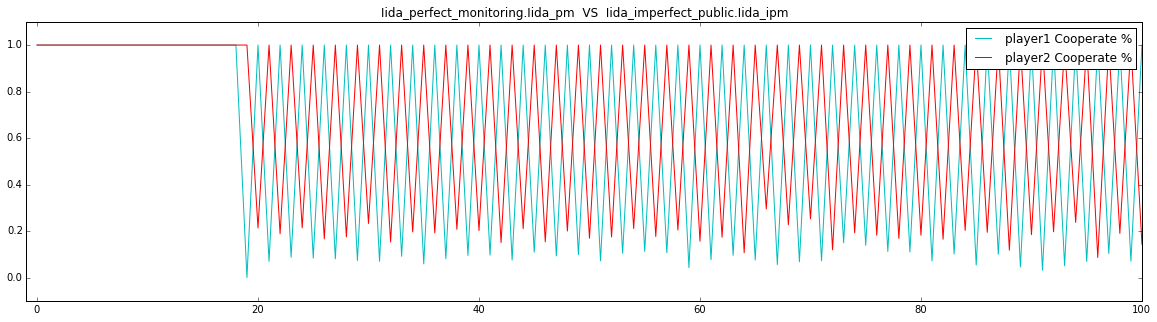

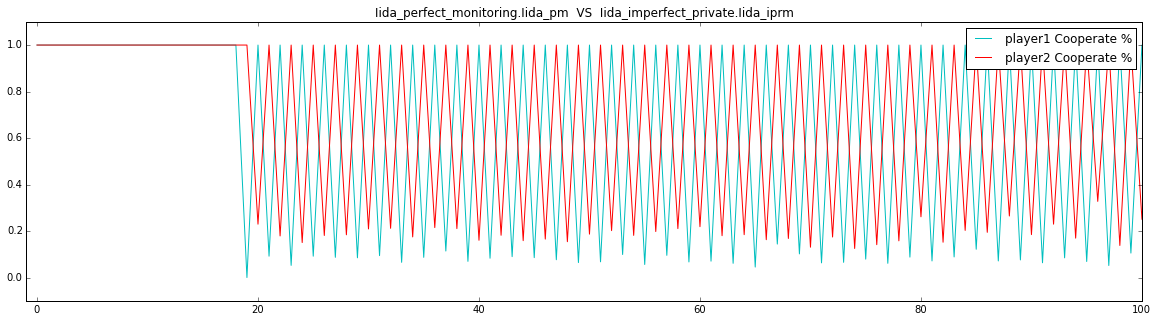

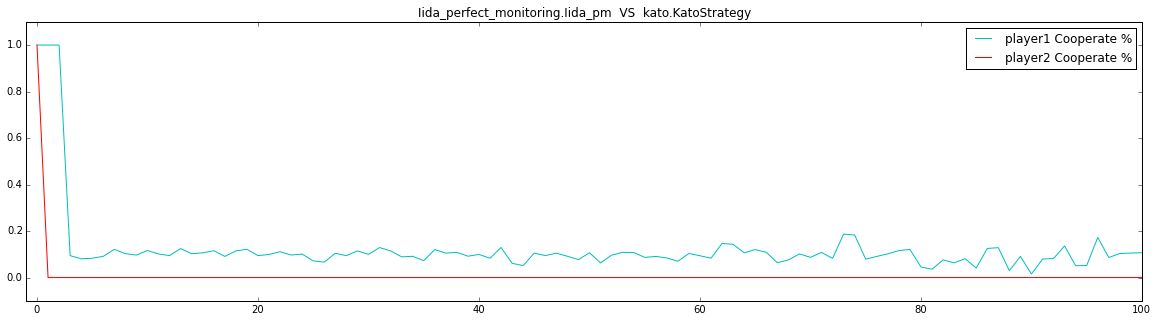

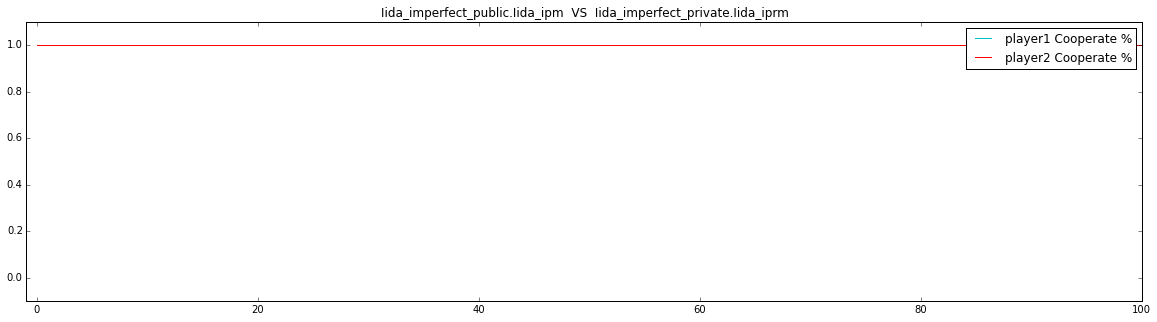

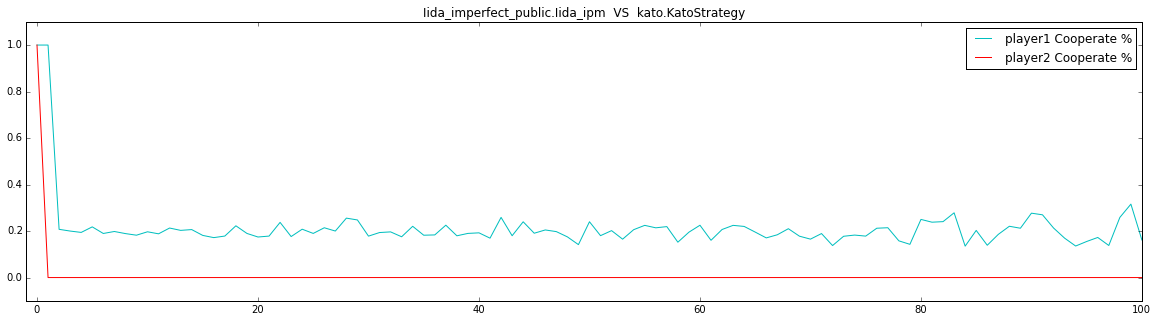

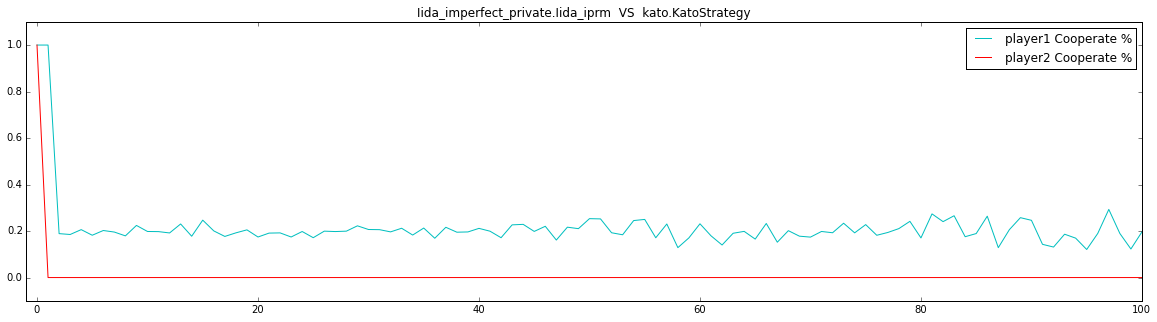

In [139]:
# 結果の読み込み
df_public = pd.read_csv("record_2015-10-19-02-05-20.csv")
plotC(df_public)

## 平均利得分布

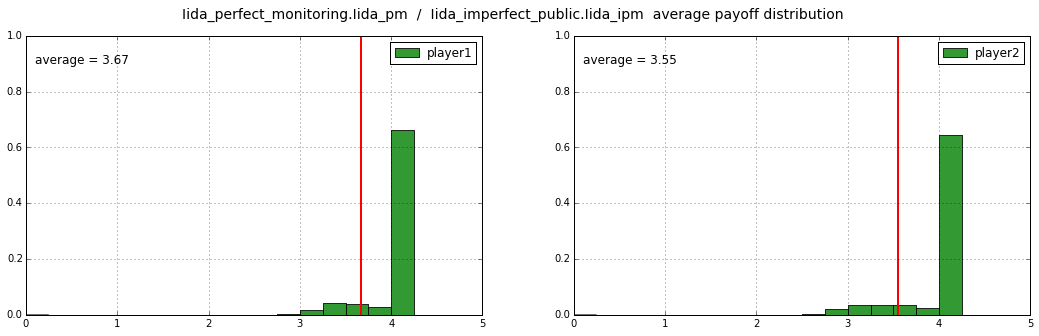

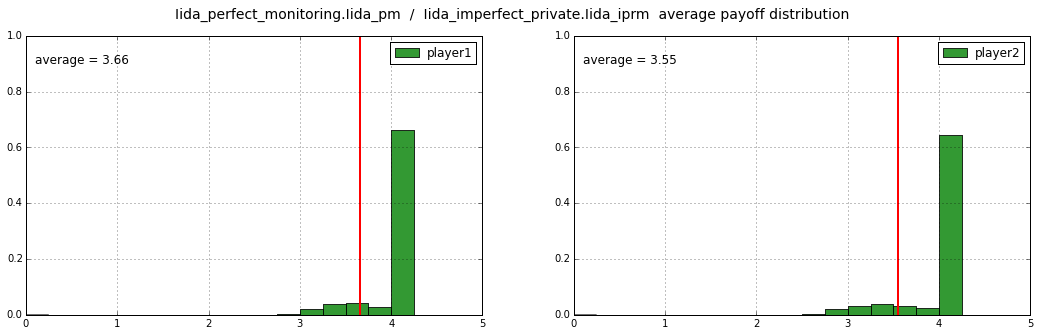

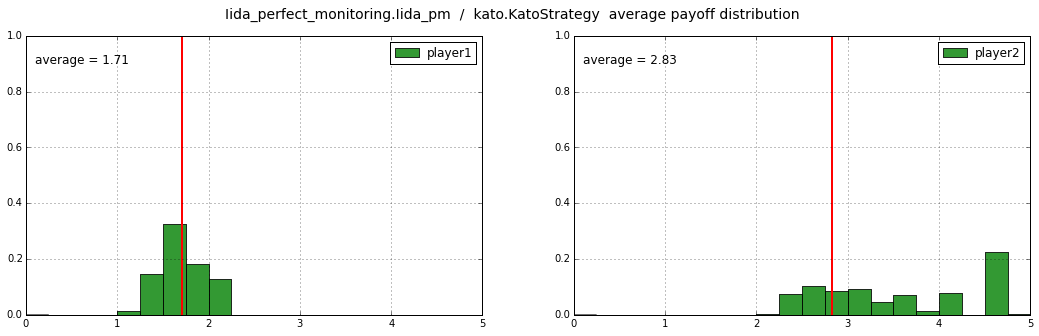

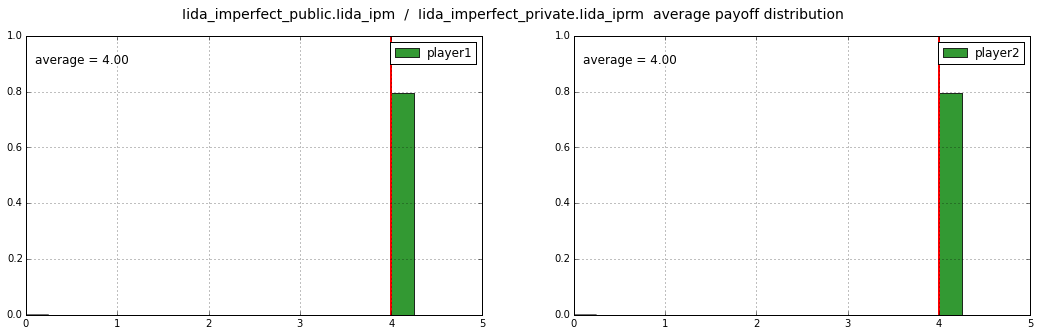

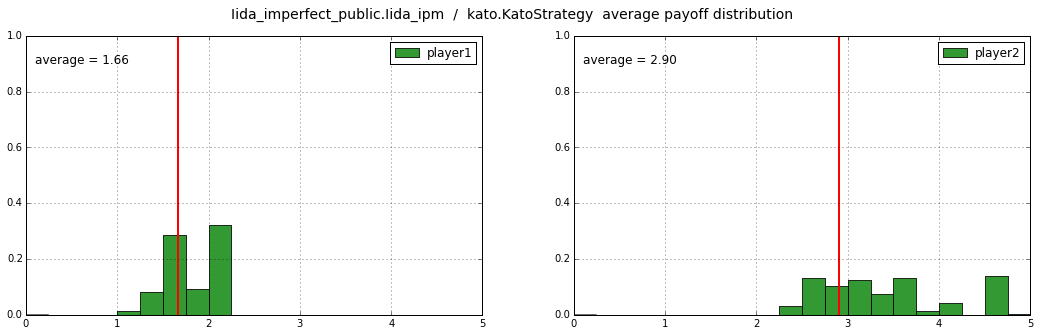

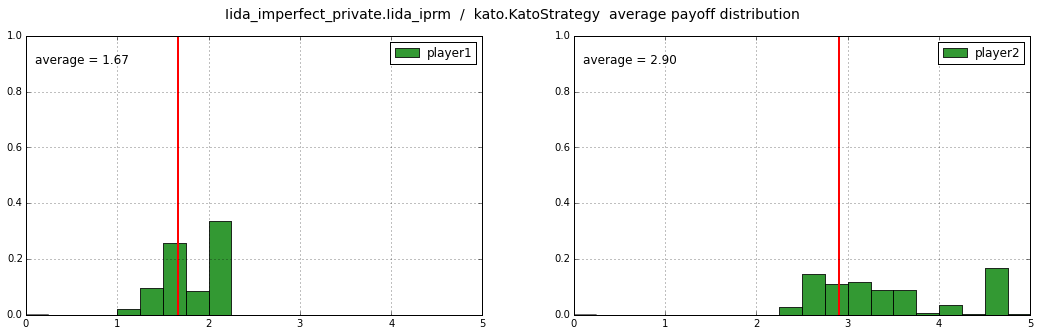

In [138]:
# 結果の読み込み
df_public = pd.read_csv("record_2015-10-19-02-05-20.csv")
plotAve(df_public)

## Case3: Imperfect private monitoring

In [150]:
# 「相手の」シグナルが協調か攻撃かを（ノイズ付きで）返す
def private_signal(actions):
    pattern = [[0, 0], [0, 1], [1, 0], [1, 1]]
    # 例えば実際の行動が(0, 1)なら、シグナルは(1, 0)である可能性が最も高い
    signal_probs = [[.9, .02, .02, .06], [.02, .06, .9, .02], [.02, .9, .06, .02], [.06, .02, .02, .9]]
    prob = rs.uniform()
    if actions[0] == 0 and actions[1] == 0:
        choice = rs.choice(4, p=signal_probs[0])
        return pattern[choice]

    elif actions[0] == 0 and actions[1] == 1:
        choice = rs.choice(4, p=signal_probs[1])
        return pattern[choice]

    elif actions[0] == 1 and actions[1] == 0:
        choice = rs.choice(4, p=signal_probs[2])
        return pattern[choice]

    elif actions[0] == 1 and actions[1] == 1:
        choice = rs.choice(4, p=signal_probs[3])
        return pattern[choice]

    else:
        raise ValueError

strategies = [Iida_iprm, KatoStrategy, Self_Centered_private]
game = pl.RepeatedMatrixGame(payoff, strategies, signal=private_signal, ts_length=ts_length, repeat=1000)
game.play(mtype="private", random_seed=seed, record=True)

Start
The object has 3 strategy functions below
****************************************
Iida_imperfect_private.Iida_iprm
kato.KatoStrategy
ikegami_imperfect_private.Self_Centered_private
****************************************
Repeats: 1000
Total time series length: 34333

Game 1: "Iida_imperfect_private.Iida_iprm" vs "kato.KatoStrategy"
total score of Iida_imperfect_private.Iida_iprm: 55764.000, per stage: 1.624
total score of kato.KatoStrategy: 93019.000, per stage: 2.709

Game 2: "Iida_imperfect_private.Iida_iprm" vs "ikegami_imperfect_private.Self_Centered_private"
total score of Iida_imperfect_private.Iida_iprm: 153145.000, per stage: 4.461
total score of ikegami_imperfect_private.Self_Centered_private: 74080.000, per stage: 2.158

Game 3: "kato.KatoStrategy" vs "ikegami_imperfect_private.Self_Centered_private"
total score of kato.KatoStrategy: 170665.000, per stage: 4.971
total score of ikegami_imperfect_private.Self_Centered_private: 4000.000, per stage: 0.117

Score table:
[[

## グラフを出力

### Cooperationの割合

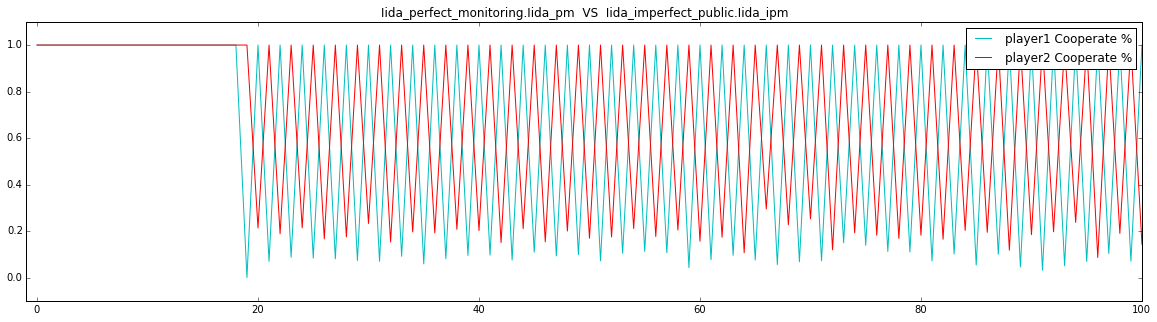

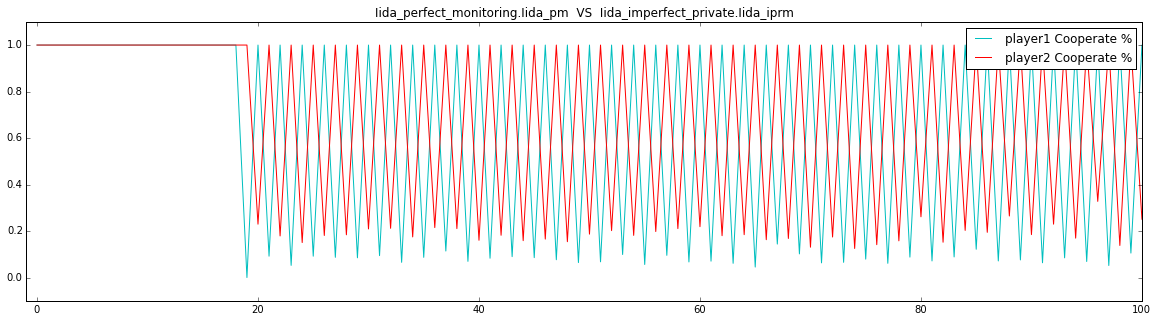

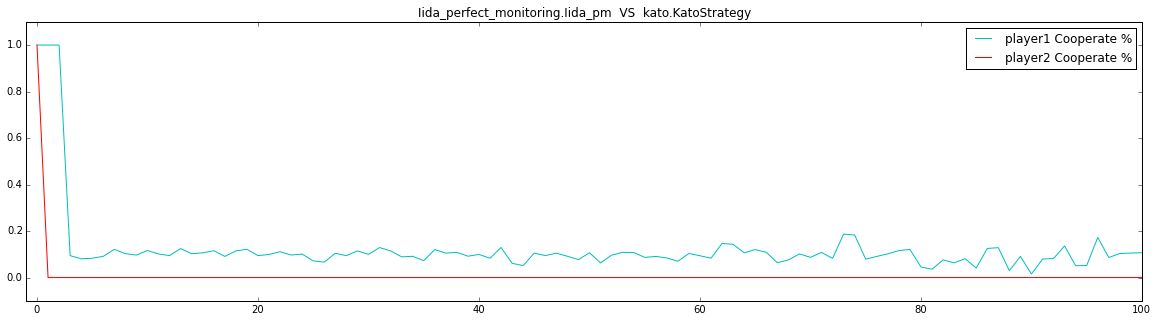

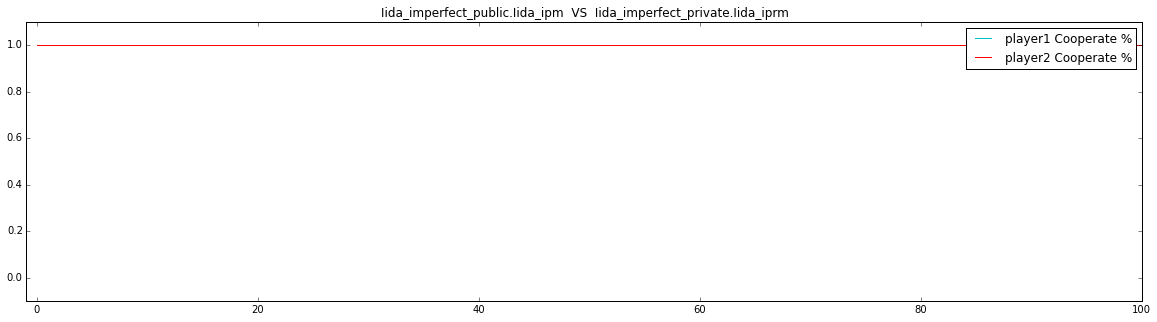

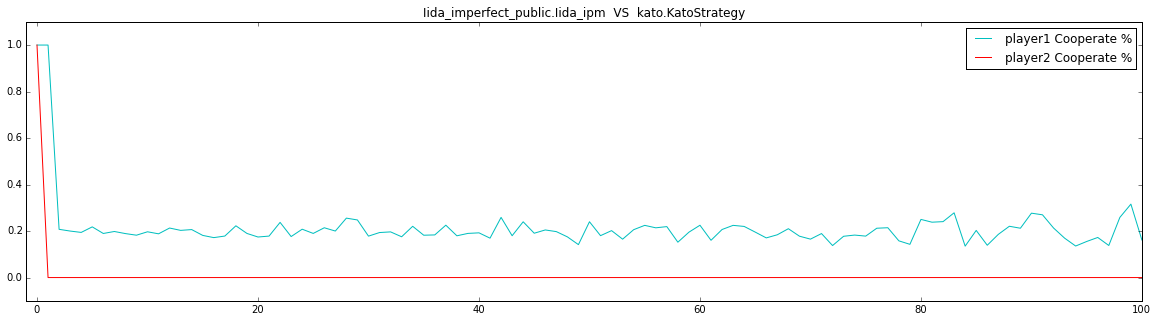

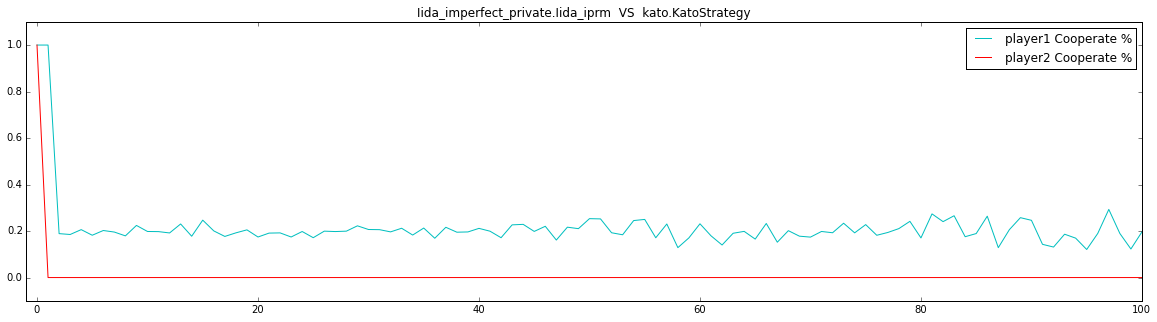

In [142]:
# 結果の読み込み
df_private = pd.read_csv("record_2015-10-19-02-05-20.csv")
plotC(df_private)

### 平均利得分布

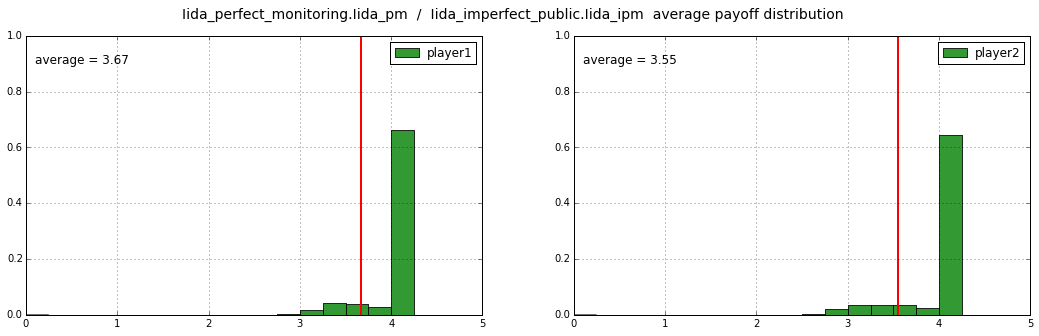

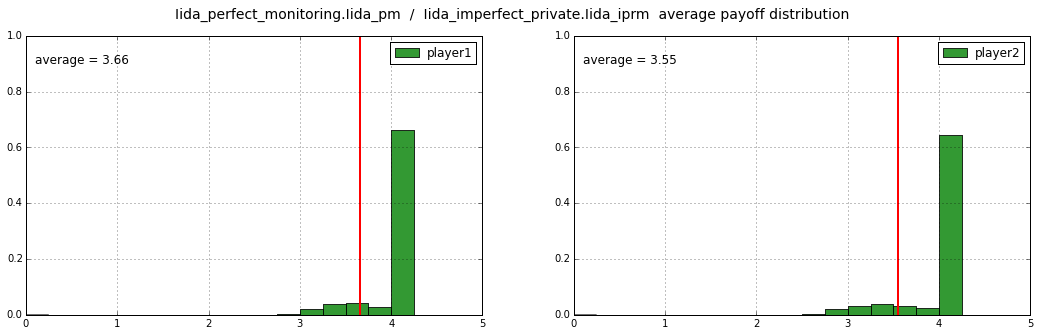

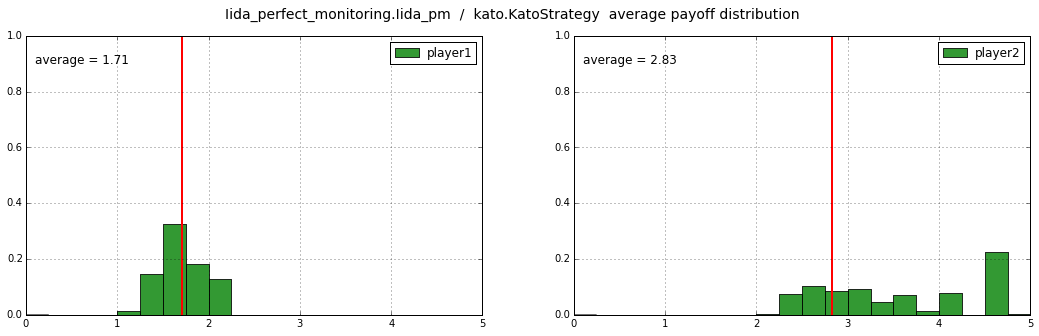

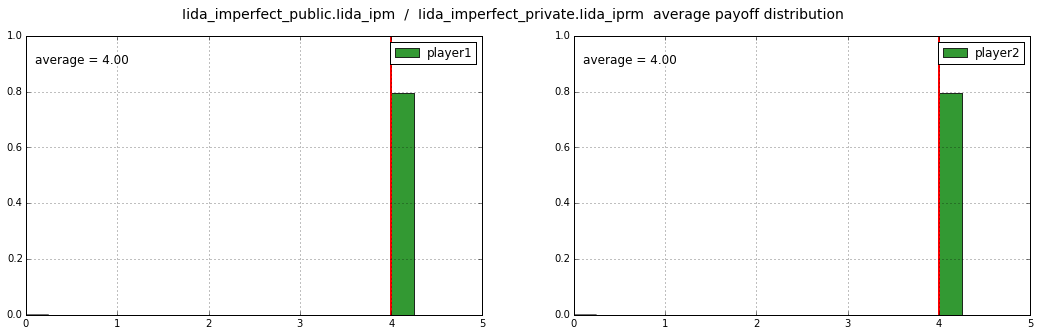

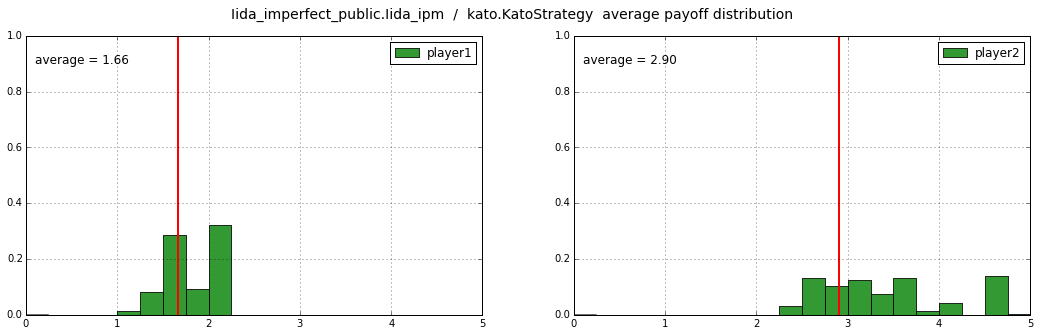

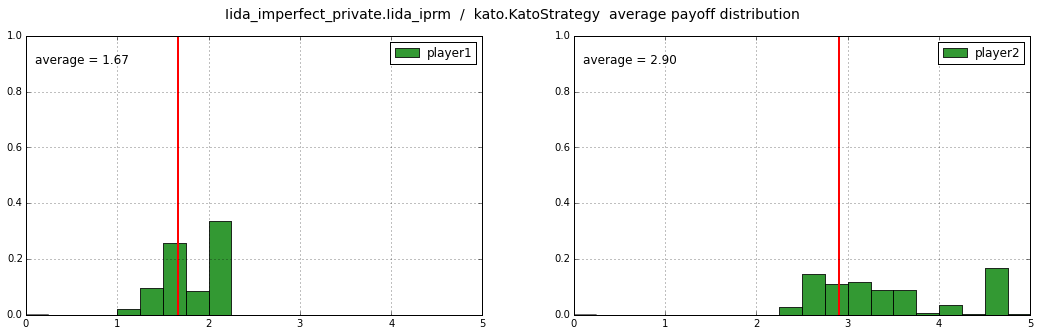

In [141]:
# 結果の読み込み
df_private = pd.read_csv("record_2015-10-19-02-05-20.csv")
plotAve(df_private)